In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.rename(columns={'sepal_length':'SL', 'sepal_width':'SW', 'petal_length':'PL', 'petal_width':'PW'}, inplace=True)
data.head()

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
iris_setosa= data[data['species']=='setosa']
iris_versicolor= data[data['species']=='versicolor']
iris_virginica= data[data['species']=='virginica']

**Mean**

In [7]:
print(np.mean(iris_setosa['SW']))
print(np.mean(iris_setosa['SL']))
print(np.mean(iris_setosa['PW']))
print(np.mean(iris_setosa['PL']))

3.418
5.006
0.244
1.464


(array([ 1.,  1.,  2.,  7., 12., 14.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

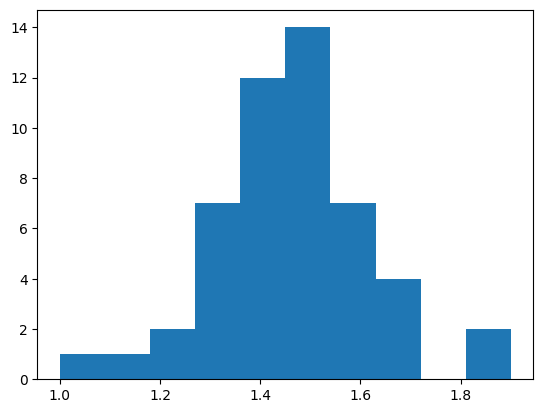

In [8]:
plt.hist(iris_setosa['PL'])

In [9]:
np.mean(np.append(iris_setosa['PL'], 50))

2.4156862745098038

just adding one number 50, the mean shifted alot.
To solve this issue, we need to keep in mind that data should not contain any outliers
to solve this problem we use median

**Median**

Median does not work on outliers

In [10]:
print(np.median(iris_setosa['SW']))
print(np.median(iris_setosa['SL']))
print(np.median(iris_setosa['PW']))
print(np.median(iris_setosa['PL']))

3.4
5.0
0.2
1.5


In [11]:
np.median(np.append(iris_setosa['PL'], 50))

1.5

* median will be unaffected if more than the half value of data is outliers.
* once the outliers in the data points are more than the half value the all the data points then the median will change

**Mode**

In [12]:
from scipy import stats

In [13]:
print(stats.mode(iris_setosa['PL']))
print(stats.mode(iris_versicolor['PL']))
print(stats.mode(iris_virginica['PL']))

ModeResult(mode=1.5, count=14)
ModeResult(mode=4.5, count=7)
ModeResult(mode=5.1, count=7)
